# Importing in necessary libraries

In [10]:
#Data Handling and Analysis:
import pandas as pd
import numpy as np


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Time Series Forecasting
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

#Evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score


# Read in the Sales Data Set

In [5]:
# Read the CSV file
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales Data Analysis/sales_data_sample.csv', encoding="ISO-8859-1")
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
sales_data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [7]:
# Display shape, data types, and basic statistics
print("Shape of the dataset:", sales_data.shape)
print("\nData Types:\n", sales_data.dtypes)
print("\nBasic Statistics:\n", sales_data.describe(include="all"))

Shape of the dataset: (2823, 25)

Data Types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Basic Statistics:
          ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count    2823.000000      2823.000000  2823.000000      2823.000000   
unique           NaN              NaN          NaN              NaN   
top   

In [8]:
#check for missing values
missing_values = sales_data.isnull().sum()
print("\nMissing Values by Column:\n", missing_values)



Missing Values by Column:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


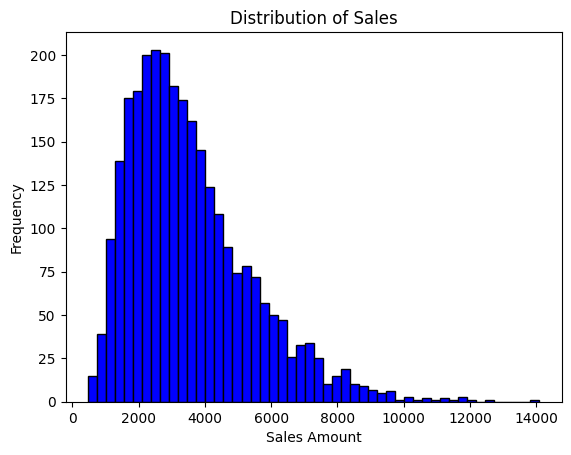

In [11]:
# Example: Histogram for 'SALES' column
plt.hist(sales_data['SALES'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


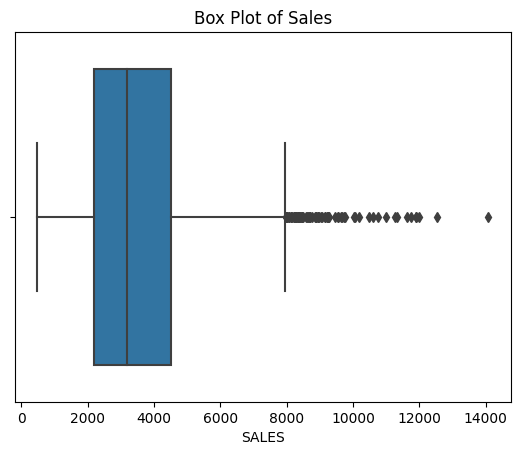

In [13]:
#Check for Outliers:
# Example: Box plot for 'SALES' column
sns.boxplot(x=sales_data['SALES'])
plt.title('Box Plot of Sales')
plt.show()

<ipython-input-14-ce0be39d7824>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_data.corr()


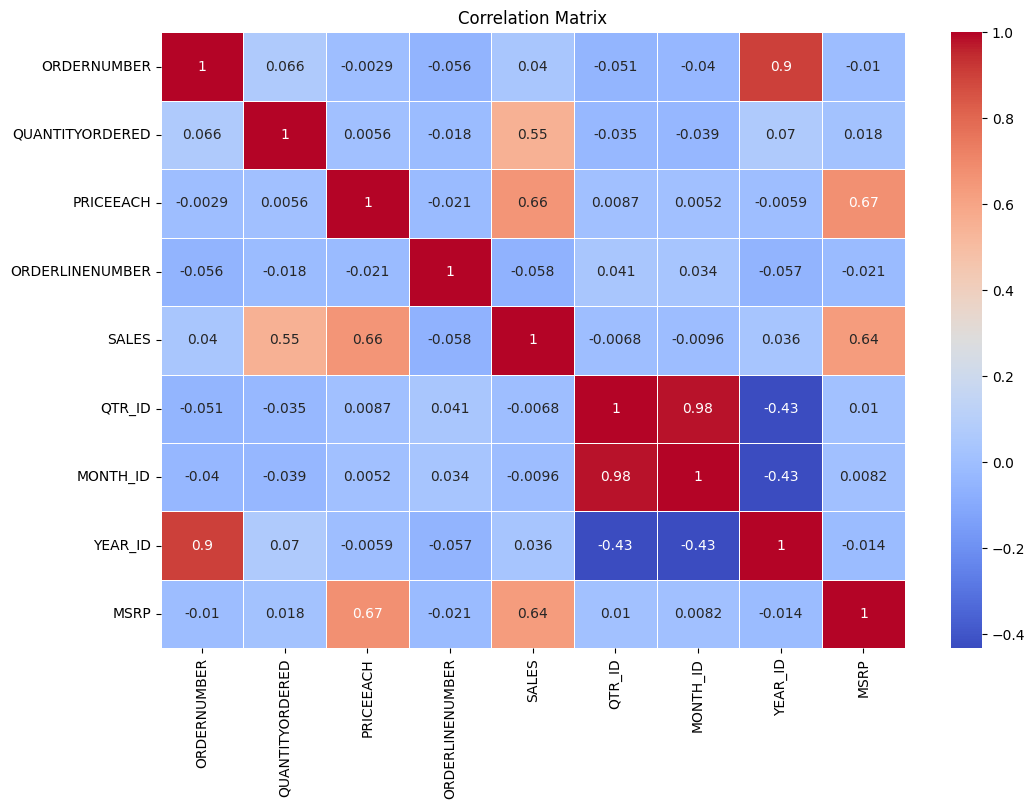

In [14]:
#Check for correlation
correlation_matrix = sales_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

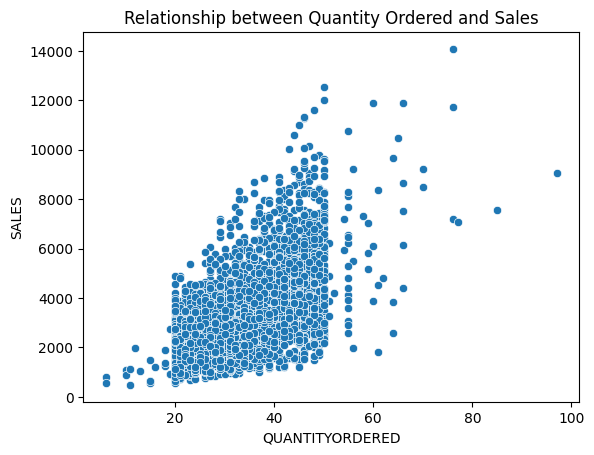

In [16]:
 # Relationship between QUANTITYORDERED and SALES:
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=sales_data)
plt.title('Relationship between Quantity Ordered and Sales')
plt.show()


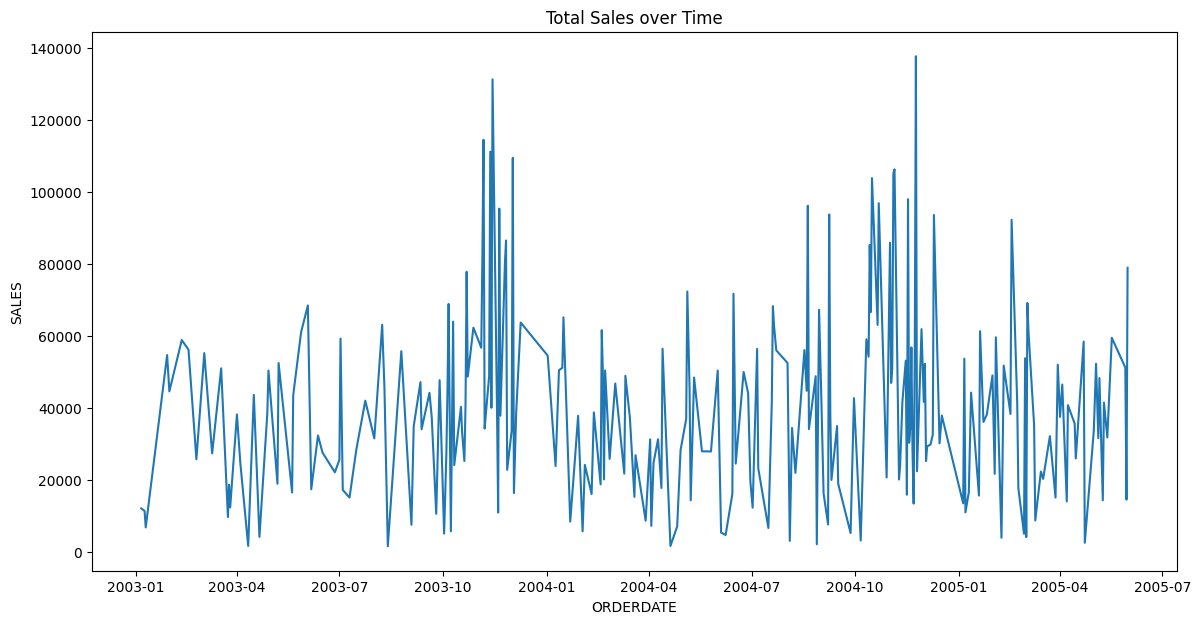

In [17]:
#Time-based Patterns:
#Given that we have an ORDERDATE column, we can explore how sales have evolved over time.
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])
sales_over_time = sales_data.groupby('ORDERDATE')['SALES'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='ORDERDATE', y='SALES', data=sales_over_time)
plt.title('Total Sales over Time')
plt.show()


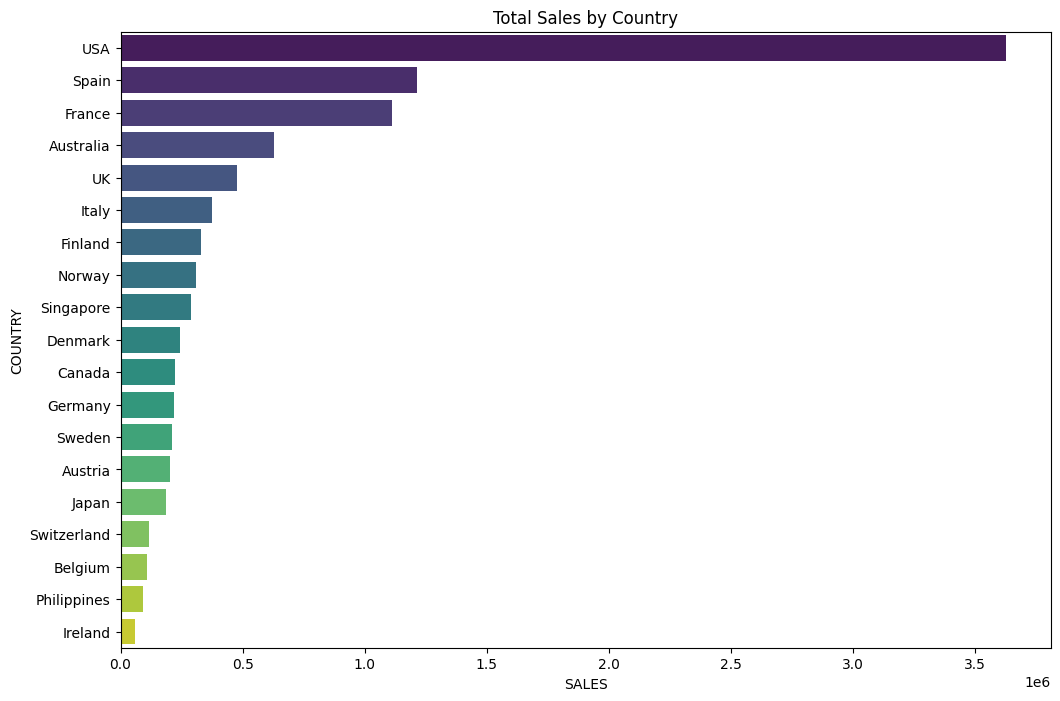

In [18]:
# Analyzing Sales by Country:
sales_by_country = sales_data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='SALES', y='COUNTRY', data=sales_by_country, palette='viridis')
plt.title('Total Sales by Country')
plt.show()
